In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
covid19_data = pd.read_csv('covid19Data.csv')
covid19_data

,Name,WHO Region,Cases - cumulative total,Deaths - cumulative total,Transmission Classification
0,United States of America,Americas,25930068,437964,Community transmission
1,India,South-East Asia,10766245,154486,Clusters of cases
2,Brazil,Americas,9204731,224504,Community transmission
3,Russian Federation,Europe,3884730,74158,Clusters of cases
4,The United Kingdom,Europe,3835787,106564,Community transmission
...,...,...,...,...,...
232,Saint Helena,Africa,0,0,No cases
233,Tokelau,Western Pacific,0,0,No cases
234,Tonga,Western Pacific,0,0,No cases
235,Turkmenistan,Europe,0,0,No cases


In [3]:
data_contingency_table = pd.crosstab(covid19_data['WHO Region'], covid19_data['Transmission Classification'], margins=False)
data_contingency_table

Transmission Classification,Clusters of cases,Community transmission,No cases,Not applicable,Pending,Sporadic cases
WHO Region,,,,,,
Africa,3,43,1,0,1,2
Americas,9,35,2,0,0,10
Eastern Mediterranean,5,16,0,0,0,1
Europe,16,38,3,0,1,4
Other,0,0,0,1,0,0
South-East Asia,7,2,1,0,0,1
Western Pacific,9,2,15,0,1,8


In [4]:
stat, p, dof, expected = chi2_contingency(data_contingency_table)
print("Chi Square Value: ",stat)
print("Degree of Freedom: ",dof)
print("Confidence: ",p)

Chi Square Value:  345.49703574625886
Degree of Freedom:  30
Confidence:  2.489607523110138e-55


In [5]:
covid19_data.cov()

,Cases - cumulative total,Deaths - cumulative total
Cases - cumulative total,3.918519e+12,7.047396e+10
Deaths - cumulative total,7.047396e+10,1.387488e+09


In [6]:
covid19_data.corr(method='pearson', min_periods=1)

,Cases - cumulative total,Deaths - cumulative total
Cases - cumulative total,1.000000,0.955769
Deaths - cumulative total,0.955769,1.000000


<AxesSubplot:xlabel='Cases - cumulative total', ylabel='Deaths - cumulative total'>

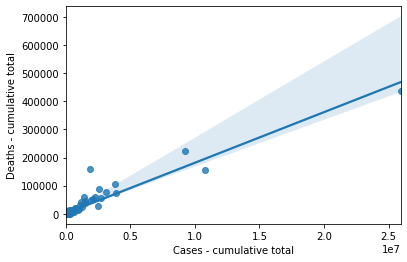

In [7]:
sns.regplot(x=covid19_data['Cases - cumulative total'], y=covid19_data['Deaths - cumulative total'])